# Debt to GDP Calculations
---

### Import Libraries 

In [1]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

### Import `debtToGDP.py` 

In [2]:
import debtToGDP as dtg
debtion = dtg.DEBT(dtg.measurements)

### Set Y-Ticks 

In [3]:
# Set YTicks to Millions
def millions(x, pos):
    return '%1.1fT' % (x * 1e-6)

def percentages(x, pos): 
    return '%1.1fp' % (x*100)

formatterMilly = FuncFormatter(millions)
formatterPercent = FuncFormatter(percentages)

## Debt By Category:
---

In [4]:
# Total Household and Non-Profit Debt 
house_debt = debtion.total_household_nonprofit_debt()

# Total US Government Debt 
gov_debt = debtion.total_gov_debt()

# Total US Business Debt 
biz_debt = debtion.total_business_debt()

### Plot

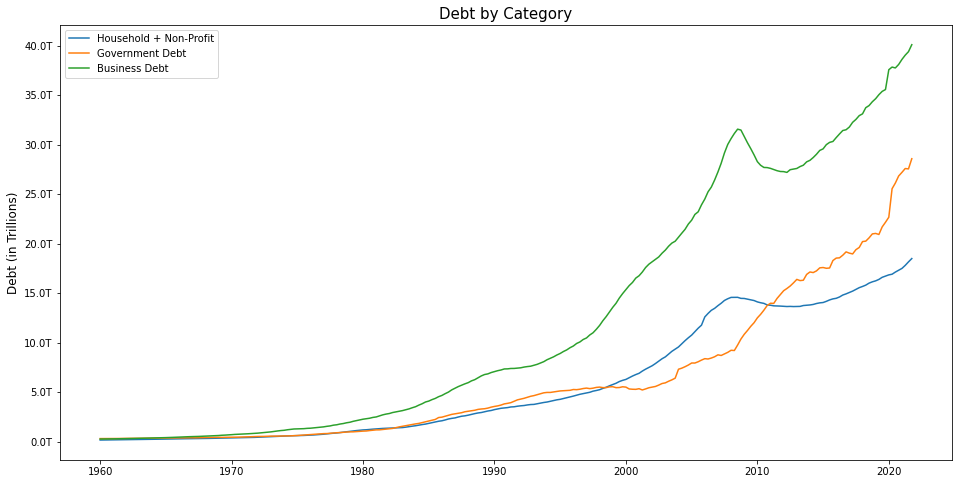

In [5]:
# Plotting 
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(house_debt['debt_sum'], label='Household + Non-Profit')
ax.plot(gov_debt['debt_sum'], label='Government Debt')
ax.plot(biz_debt['debt_sum'], label='Business Debt')

ax.set_title('Debt by Category', fontsize=15)
ax.set_ylabel('Debt (in Trillions)', fontsize=12)
ax.yaxis.set_major_formatter(formatterMilly)
ax.legend(loc=2)

## Debt to GDP
---

In [6]:
# US Debt to GDP
d_gdp = debtion.usDebt_to_gdp()

# YOY Debt to GDP Change
yoy = debtion.yoy_debt_to_gdp_change()

### Plot

Text(0.5, 1.0, 'Debt to GDP Changes')

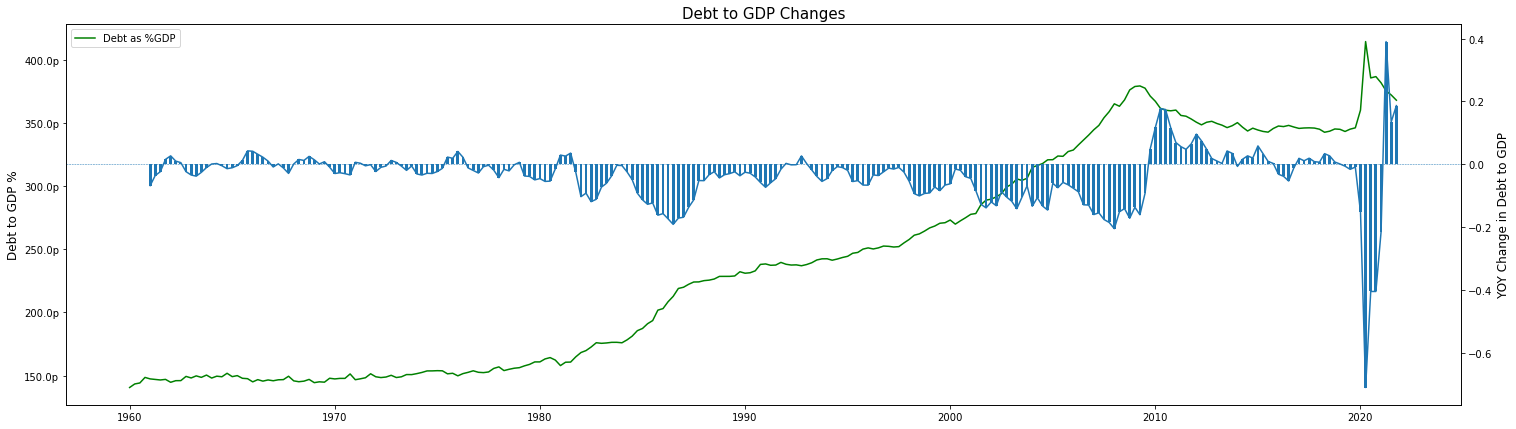

In [7]:
# Plotting 
fig, ax = plt.subplots(figsize=(25,7))

ax.plot(d_gdp['Debt_as_%_GDP'], label='Debt as %GDP',color='g')
ax.set_ylabel('Debt to GDP %', fontsize=12)
ax.yaxis.set_major_formatter(formatterPercent)
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(yoy.index,yoy['Change'], label='YOY Change')
ax2.bar(yoy.index, yoy['Change'], width=50)
ax2.axhline(y=0, linewidth=.5, linestyle='--')
ax2.set_ylabel('YOY Change in Debt to GDP', fontsize=12)
ax2.set_title('Debt to GDP Changes', fontsize=15)

In [8]:
yoy.tail(20)

,ASTLL,ASTDSL,GDP,Total_Debt,Debt_as_%_GDP,Change
DATE,,,,,,
2017-01-01,25083834.0,41115116.0,19153912.0,66198950.0,3.456158,0.018868
2017-04-01,25491290.0,41356131.0,19322920.0,66847421.0,3.459489,0.011060
2017-07-01,25597498.0,42088408.0,19558693.0,67685906.0,3.460656,0.019273
2017-10-01,26163706.0,42609233.0,19882965.0,68772939.0,3.458887,0.008239
2018-01-01,26096930.0,43393110.0,20143716.0,69490040.0,3.449713,0.006445
2018-04-01,26698870.0,43501997.0,20492492.0,70200867.0,3.425687,0.033801
2018-07-01,26959454.0,43983818.0,20659102.0,70943272.0,3.433996,0.026660
2018-10-01,27343992.0,44498571.0,20813325.0,71842563.0,3.451758,0.007129
2019-01-01,27622171.0,44809215.0,21001591.0,72431386.0,3.448852,0.000861
